# Live Code 2 Phase 0

Nama: Judan Syamsul Hadad

Batch: FTDS-009

# Problems

## Nomor 1

Kirim pesan "Prepare to negotiate" dengan cara di-encode (kalikan dengan matriks encoder) lalu di-decode (kalikan dengan invers matriks encoder) untuk memastikan isi pesan tidak berubah. Teknik yang digunakan adalah mengubah huruf ke angka. Misal A=1, Z=26, spasi=0.

### Import Library

Mulai dengan import library numpy.

In [1]:
import numpy as np #import library numpy

### Data Loading

Buat variabel berisi pesan yang akan disampaikan.

In [2]:
pesan = "Prepare to negotiate"
pesan

'Prepare to negotiate'

### Mathematical Calculations

Buat fungsi untuk mengubah pesan menjadi angka.

In [3]:
def alpha_to_num(input_string):
    kode = [] #list kosong untuk menampung kode
    input_string = input_string.lower() #mengubah huruf besar menjadi huruf kecil karena perubahan huruf ke angka tidak mempertimbangkan besar kecil, sedangkan di python berpengaruh
    for huruf in input_string: #loop mengubah huruf menjadi angka
        angka = ord(huruf) - 96 #mengubah huruf menjadi angka
        if angka == -64: #jika angka bernilai -64, maka
            angka = 0 #angka bernilai 0 (spasi)
        kode.append(angka) #tampung angka ke dalam kode
    return kode #luaran fungsi ada kode

kode = np.array(alpha_to_num(pesan))
kode

array([16, 18,  5, 16,  1, 18,  5,  0, 20, 15,  0, 14,  5,  7, 15, 20,  9,
        1, 20,  5])

Cek bentuk variabel kode.

In [4]:
kode.shape

(20,)

Variabel kode harus kita encode dengan cara dikalikan dengan matriks encoder. Definisikan matriks encoder dan reshape matriks kode terlebih dahulu.

In [5]:
E = np.array([[2,1,0,4],[3,4,2,1],[1,1,9,0],[0,7,8,3]])
E

array([[2, 1, 0, 4],
       [3, 4, 2, 1],
       [1, 1, 9, 0],
       [0, 7, 8, 3]])

Cek bentuk matriks encoder.

In [6]:
E.shape

(4, 4)

Agar memenuhi aturan perkalian matriks, maka variabel kode harus diubah ke matriks dengan ukuran panjang 'x' dan lebar 4.

In [7]:
kode = np.reshape(kode,(-1,4))
kode.shape

(5, 4)

Lakukan perkalian dot untuk menghasilkan variabel transmisi yang berupa dot product kedua matriks di atas (kode@encoder)

In [8]:
transmisi = kode@E
transmisi

array([[ 91, 205, 209, 130],
       [ 61,  78,  81,  22],
       [ 85, 178, 142, 137],
       [ 46, 188, 309,  87],
       [ 41,  68, 222,  52]])

Cek bentuk matriks transmisi.

In [9]:
transmisi.shape

(5, 4)

Didapat matriks dengan ukuran 5x4.

Untuk memastikan bahwa transmisi tersebut benar, ubah kembali matriks transmisi menjadi matriks pesan dengan mengkalikan matriks transmisi dengan invers matriks encoder. Hasil perkalian ini kita sebut matriks decoded.

In [10]:
decoded = transmisi@np.linalg.inv(E)
decoded

array([[ 1.60000000e+01,  1.80000000e+01,  5.00000000e+00,
         1.60000000e+01],
       [ 1.00000000e+00,  1.80000000e+01,  5.00000000e+00,
        -2.08166817e-16],
       [ 2.00000000e+01,  1.50000000e+01,  1.57859836e-15,
         1.40000000e+01],
       [ 5.00000000e+00,  7.00000000e+00,  1.50000000e+01,
         2.00000000e+01],
       [ 9.00000000e+00,  1.00000000e+00,  2.00000000e+01,
         5.00000000e+00]])

Cek apakah matriks kode dan matriks decoded sama atau tidak.

In [11]:
np.allclose(kode,decoded)

True

Kedua matriks tersebut berisi kode yang sama.

### Jawaban dari Pertanyaan

1. Ukuran matriks yang mungkin untuk dikalikan adalah 5x4 dengan 5 adalah baris dan 4 adalah kolom. Aturan perkalian matriks adalah A(b,k) @ B(r,c) dimana k=r agar dapat dilakukan perkalian. Hasil kalinya akan membentuk matriks baru C(b,c). Pada kasus ini nilai c sama dengan k sehingga bentuk matriks yang akan ditransmisikan tidak berubah, dari **5**x4 dot 4x**4** menjadi **5x4** kembali.
2. **Matriks encoder x matriks pesan** tidak sama dengan **matriks pesan x matriks encoder**. Susunan perkalian matriks yang benar adalah **matriks pesan x matriks encoder**. Hasil perkalian ini akan menghasilkan matriks 5x4. Jika dibalik menjadi **matriks encoder x matriks pesan**, maka akan terjadi perkalian encoder(4,**4**) @ kode(**5**,4) dimana jumlah kolom pada matriks encoder tidak sama dengan jumlah baris pada matriks pesan dan tidak dapat dilakukan perkalian dot product.
3. Pada dasarnya jika matriks dikalikan dengan invers-nya akan menghasilkan matriks identitas. Hal ini dilakukan pada tahapan di atas dimana matriks kode dikalikan dengan matriks encoder dan kemudian hasil dot product-nya dikalikan lagi dengan invers matriks encoder. Hasilnya sama saja dengan matriks kode dikalikan dengan matriks identitas, tidak terjadi perubahan pada matriks kode. Sedangkan jika mengalikan matriks transmisi dengan matriks encoder lagi, maka tidak terbentuk matriks identitas sehingga matriks kode tidak akan sama dengan matriks decoded. Lihat bentuk perkalian di bawah:

Jika:
- kode @ encoder = transmisi
- encoder @ inv(encoder) = identitas

maka:
- transmisi @ inv(encoder) = decoded
- kode @ encoder @ inv(encoder) = decoded
- kode @ identitas = decoded
- kode = decoded

## Nomor 2

Akan dilakukan perbandingan AUC Score antara model Random Forest Regressor (RFR) dan Support Machine Regressor (SVR). Model dengan AUC Score mendekati 1 adalah model terbaik. Hitung AUC Score kedua model tersebut.

### Jawaban dari Pertanyaan

1. Karena bentuknya dua dimensi, kita bisa menggunakan integral trapezoid untuk menghitung luas area di bawah kurva (delta x * (y+1 - y)/2). Pada kebanyakan kasus, bentuk integral trapezoid dapat menyesuaikan bentuk kurva dengan lebih baik karena mempertimbangkan nilai sumbu y di dua titik yang akan dihitung luasnya. Jika menggunakan integral quad atau dengan bentuk persegi, maka akan ada luas area yang kurang atau lebih (galat/error) tergantung sumbu y mana yang dipakai (y atau y+1).

2. Untuk perhitungan AUC Score akan menggunakan metode numerik karena keluaran yang akan dibandingkan dalam bentuk angka. Jika pada dataset sudah tersedia nilai sumbu y untuk RFR dan SVR, maka tidak perlu pendefinisian fungsi matematika.

### Import Library

Import library terlebih dahulu.

In [12]:
import pandas as pd
from scipy import trapz
import matplotlib.pyplot as plt

### Data Loading & Data Cleaning

Load dataset.

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/ROC%20Curve%20SVR%20-%20Random%20Forest.csv?token=AEZDEHVS66CKQBUSHKZ534TA44EVO')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  66 non-null     int64  
 1   svr_fpr     66 non-null     float64
 2   svr_tpr     66 non-null     float64
 3   rfr_fpr     66 non-null     float64
 4   rfr_tpr     66 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.7 KB


Tidak ada null value pada data. Cek isi data.

In [14]:
df.head()

,Unnamed: 0,svr_fpr,svr_tpr,rfr_fpr,rfr_tpr
0,0,0.000000,0.000000,0.000000,0.000000
1,1,0.000000,0.015152,0.000000,0.030303
2,2,0.004831,0.030303,0.000000,0.060606
3,3,0.009662,0.030303,0.000000,0.106061
4,4,0.012077,0.045455,0.002415,0.121212


Hapus kolom 'Unnamed: 0' karena tidak dipakai pada analisis ini.

In [15]:
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,svr_fpr,svr_tpr,rfr_fpr,rfr_tpr
0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.015152,0.000000,0.030303
2,0.004831,0.030303,0.000000,0.060606
3,0.009662,0.030303,0.000000,0.106061
4,0.012077,0.045455,0.002415,0.121212


In [16]:
df.tail()

,svr_fpr,svr_tpr,rfr_fpr,rfr_tpr
61,0.973430,0.969697,0.449275,0.984848
62,0.973430,0.969697,0.507246,0.984848
63,0.992754,1.000000,0.582126,0.984848
64,0.997585,1.000000,0.722222,1.000000
65,0.997585,1.000000,1.000000,1.000000


Data sudah dalam bentuk koordinat sumbu untuk masing-masing model. Untuk menghitung integral trapezoid, kita perlu meyakinkan bahwa sumbu x sudah berurutan dari 0 ke 1 di masing-masing model. Buat dua dataframe baru untuk masing-masing model.

In [17]:
df_svr = df.copy() #copy df ke df_svr
df_svr.drop(columns={'rfr_fpr','rfr_tpr'},inplace=True) #drop kolom rfr
df_svr.sort_values(by='svr_fpr',ascending=True) #sort dari kecil ke besar berdasarkan kolom svr_fpr (sumbu x svr)

,svr_fpr,svr_tpr
0,0.000000,0.000000
1,0.000000,0.015152
2,0.004831,0.030303
3,0.009662,0.030303
4,0.012077,0.045455
...,...,...
61,0.973430,0.969697
62,0.973430,0.969697
63,0.992754,1.000000
64,0.997585,1.000000


In [18]:
df_rfr = df.copy() #copy df ke df_rfr
df_rfr.drop(columns={'svr_fpr','svr_tpr'},inplace=True)  #drop kolom svr
df_rfr.sort_values(by='rfr_fpr',ascending=True) #sort dari kecil ke besar berdasarkan kolom rfr_fpr (sumbu x rfr)

,rfr_fpr,rfr_tpr
0,0.000000,0.000000
1,0.000000,0.030303
2,0.000000,0.060606
3,0.000000,0.106061
4,0.002415,0.121212
...,...,...
61,0.449275,0.984848
62,0.507246,0.984848
63,0.582126,0.984848
64,0.722222,1.000000


Deklarasi variabel x dan y untuk masing-masing model agar lebih mudah dipanggil.

In [19]:
#deklarasi variabel svr untuk memudahkan pemanggilan
x_svr = df_svr['svr_fpr']
y_svr = df_svr['svr_tpr']

#deklarasi variabel rfr untuk memudahkan pemanggilan
x_rfr = df_rfr['rfr_fpr']
y_rfr = df_rfr['rfr_tpr']

### Mathematical Calculations

Kita bisa lihat gambaran kedua model pada kurva berikut:

Text(0.5, 1.0, 'RFR')

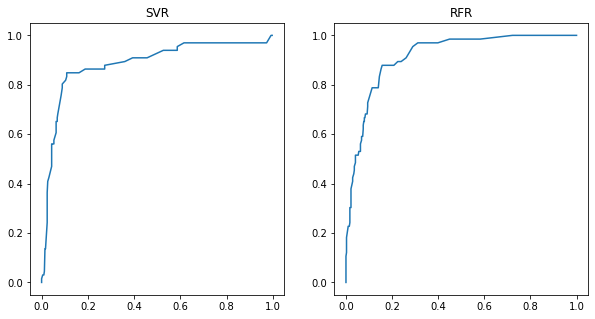

In [20]:
fig, ax = plt.subplots(ncols=2,figsize=(10,5)) #subplot dua kolom
ax[0].plot(x_svr,y_svr) #plot SVR
ax[0].set_title('SVR')
ax[1].plot(x_rfr,y_rfr) #plot RFR
ax[1].set_title('RFR')

Sekilas terlihat bahwa luas area di bawah kurva RFR lebih besar dibandingkan SVR terutama di sumbu x 0.2 sampai 0.6. Sekarang kita hitung integral trapezoid-nya.

In [21]:
AUC_Score_SVR = trapz(y_svr,x_svr)
AUC_Score_SVR

C:\Users\Judan Syamsul Hadad\AppData\Local\Temp\ipykernel_3392\1755854243.py:1: DeprecationWarning: scipy.trapz is deprecated and will be removed in SciPy 2.0.0, use numpy.trapz instead
  AUC_Score_SVR = trapz(y_svr,x_svr)


0.8817889035280342

In [22]:
AUC_Score_RFR = trapz(y_rfr,x_rfr)
AUC_Score_RFR

C:\Users\Judan Syamsul Hadad\AppData\Local\Temp\ipykernel_3392\1783318488.py:1: DeprecationWarning: scipy.trapz is deprecated and will be removed in SciPy 2.0.0, use numpy.trapz instead
  AUC_Score_RFR = trapz(y_rfr,x_rfr)


0.9160262040696824

Hasil dari integral trapezoid adalah AUC Score untuk masing-masing model. Didapat AUC Score untuk SVR 0.88 dan untuk RFR 0.92.

### Jawaban dari Pertanyaan

3. Berdasarkan perhitungan dengan integral trapezoid dan dari grafik yang dihasilkan, metode RFR akan menghasilkan model terbaik karena memiliki AUC Score yang lebih besar dibandingkan metode SVR.

In [23]:
print('AUC Score SVR: ', round(AUC_Score_SVR,2))
print('AUC Score RFR: ', round(AUC_Score_RFR,2))

AUC Score SVR:  0.88
AUC Score RFR:  0.92
